In [19]:
%pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [1]:
import imageio
import numpy as np
from IPython.display import Image

def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)


def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.

    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename


def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

In [3]:
import h5py
import torch
import pandas as pd
name = "iemo"

df = pd.read_pickle(f"data/{name}.pkl").head(1)

r_f = h5py.File(f"data/{name}_videos_blackground.hdf5", "r", libver="latest", swmr=True)

r_f.keys()

<KeysViewHDF5 ['train_Ses01F_script01_1_(6.21, 9.32)']>

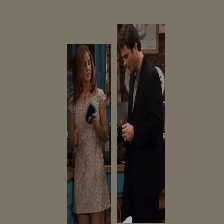

In [39]:
display_gif(video)

In [41]:
joined_r_f = h5py.File("data/joint_videos_blackground.hdf5", 'r' , libver="latest", swmr=True)